# The Battle of Neighborhoods - New York

## 1.Introduction/Business Problem
This project is talking about the neighborhoods of New York. The major Target Audience would be business owners and stake holders who planning to start a Middle and high class Italian restaurant in New York, this project would help them find the optimal location.
The Foursquare API is used to access the venues in the neighborhoods. Since, it returns less venues in the neighborhoods, we would be analysing areas for which countable number of venues are obtained. Then they are clustered based on their venues using Data Science Techniques.

Due to the high cost of restaurant, this area should be one of the regions with high employment and high imcomes.
Hope as many consumers as possible patronize the restaurant, so there should be a large and dense population nearby.
Since this is an Italian restaurant, stay away from Italian restaurant as much as possible and in areas with high dining popularity.
Tourists and business travelers have high spending power, so it's important to close to the hotel, and not too far from the city center or other tourist hotspots.
To ensure the safety of constomers and restaurant staff, select a low-risk area.

## 2.Data Requirment
In order to obtain the venue details in each neighborhood of New York City, Foursquare API is used.
https://foursquare.com/

Borough
Neighborhood
Latitude
Longitude
Venue Category data


Acquire the other data as follows:
https://data.cccnewyork.org/data    
http://wikipedia.org/wiki/Boroughs_of_New_York_City

The population density of the boroughs of New York City
Number of people in each New York Community
New York City Community Employment Rate
Median household income level
New York City reported felony rates
Community trust

## 3.Exploratory analysis

### 3.1. Download and Explore Dataset

In [11]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 3.3 MB/s eta 0:00:011


In [12]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


In [13]:
! pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [14]:
import requests
from bs4 import BeautifulSoup
import re

urldense = 'https://en.m.wikipedia.org/wiki/Boroughs_of_New_York_City'
urlpopulation = 'https://data.cccnewyork.org/api/TableData/GetTableData?filterString=ind%3D97%26tf%3D62%26fmt%3D147'
urlemploy = 'https://data.cccnewyork.org/api/TableData/GetTableData?filterString=ind%3D1260%26tf%3D62%26fmt%3D1453'
urlincome = 'https://data.cccnewyork.org/api/TableData/GetTableData?filterString=ind%3D66%26tf%3D62%26fmt%3D107'
urlcrime = 'https://data.cccnewyork.org/api/TableData/GetTableData?filterString=ind%3D1298%26tf%3D62%26fmt%3D1516'
urltrust = 'https://data.cccnewyork.org/api/TableData/GetTableData?filterString=ind%3D1312%26tf%3D41%26fmt%3D1531'
rd = requests.get(urldense)
rp = requests.get(urlpopulation)
re = requests.get(urlemploy)
ri = requests.get(urlincome)
rc = requests.get(urlcrime)
rt = requests.get(urltrust)

soupd = BeautifulSoup(rd.text, 'lxml')
soupp = BeautifulSoup(rp.text, 'lxml')
soupe = BeautifulSoup(re.text, 'html5lib')
soupi = BeautifulSoup(ri.text, 'html5lib')
soupc = BeautifulSoup(rc.text, 'lxml')
soupt = BeautifulSoup(rt.text, 'lxml')

In [15]:
import re
table_contents=[]
table = soupd.find('table')

dfd = pd.DataFrame(columns=["Borough", "Density"])

for row in table.find_all("tr"):
    col = row.find_all("td")
    if ( len(col)>2 ):
        borough = col[0].text.replace("\n", "")
        string = col[6].text.replace("\n", "")
        density = "".join(re.findall(r"\d+",string))
        density = float(density)
        dfd = dfd.append({"Borough":borough,"Density":density}, ignore_index=True)
dfd = dfd[:5]
dfd['Borough'][0] = "Bronx"
dfd

,Borough,Density
0,Bronx,33867.0
1,Brooklyn,36147.0
2,Manhattan,71341.0
3,Queens,20767.0
4,Staten Island,8157.0


In [16]:
# Population
population = str(soupp.find_all("p"))[4:-5]
# print(population)

In [17]:
import pandas as pd
import re

jp = json.loads(population)
df = pd.DataFrame(jp)
df = df[9:]

dfp = pd.DataFrame()
for row in df['rows']:
    try:
        community = row['cells'][0]['displayValue'] 
        string = row['cells'][1]['displayValue']
        totalpopulation = "".join(re.findall(r"\d+",string))
        totalpopulation = float(totalpopulation)
        dfp = dfp.append({'Community': community, 'Population': totalpopulation}, ignore_index=True)
    except:
        break
dfp.head()

,Community,Population
0,Astoria,166069.0
1,Battery Park/Tribeca,66438.0
2,Bay Ridge,121925.0
3,Bayside,114562.0
4,Bedford Park,151684.0


In [18]:
# Employment Ratio  employ[10366:11458]
employ = str(soupe.find_all("body"))[7:-8]

employ = employ[ :10365]+'"}'
# employ

In [19]:
je = json.loads(employ)
df = pd.DataFrame(je)
df = df[9:]
dfe = pd.DataFrame()
for row in df['rows']:
    try:
        community = row['cells'][0]['displayValue'] 
        employrate = row['cells'][1]['displayValue'].rstrip('%')
        employrate = float(employrate)
        dfe = dfe.append({'Community': community, 'Employrate(%)': employrate}, ignore_index=True)
    except:
        break
dfe.head()

,Community,Employrate(%)
0,Astoria,69.0
1,Battery Park/Tribeca,73.3
2,Bay Ridge,58.1
3,Bayside,59.7
4,Bedford Park,61.4


In [20]:
# Median Income
income = str(soupi.find_all("body"))[7:-8]
income = income[ :80200]+'"}'
# income
ji = json.loads(income)
df = pd.DataFrame(ji)
df = df[9:]
dfi = pd.DataFrame()
for row in df['rows']:
    try:
        community = row['cells'][0]['displayValue'] 
        string = row['cells'][1]['displayValue'].lstrip('$')
        income = "".join(re.findall(r"\d+",string))
        income = float(income)
        dfi = dfi.append({'Community': community, 'Income($)': income,}, ignore_index=True)
    except:
        break
dfi.head()

,Community,Income($)
0,Astoria,79180.0
1,Battery Park/Tribeca,162092.0
2,Bay Ridge,76569.0
3,Bayside,92682.0
4,Bedford Park,41336.0


In [21]:
# Crime
crime = str(soupc.find_all("p"))[4:-5]
jc = json.loads(crime)
df = pd.DataFrame(jc)
df = df[9:]
dfc = pd.DataFrame()
for row in df['rows']:
    try:
        community = row['cells'][0]['displayValue'] 
        crime = row['cells'][1]['displayValue']
        crime = float(crime)
        dfc = dfc.append({'Community': community, 'Crime': crime,}, ignore_index=True)
    except:
        break
dfc.head()

,Community,Crime
0,Astoria,4.3
1,Battery Park/Tribeca,2.7
2,Bay Ridge,1.6
3,Bayside,0.9
4,Bedford Park,5.9


In [22]:
# Community Trust
trust = str(soupt.find_all("p"))[4:-5]
jt = json.loads(trust)
df = pd.DataFrame(jt)
df = df[9:]
dft = pd.DataFrame()
for row in df['rows']:
    try:
        community = row['cells'][0]['displayValue'] 
        trust = row['cells'][1]['displayValue'].rstrip('%')
        trust = float(trust)
        dft = dft.append({'Community': community, 'Trust(%)': trust}, ignore_index=True)
    except:
        break
dft.tail()

,Community,Trust(%)
54,Upper West Side,71.0
55,Washington Heights,80.0
56,Williamsbridge,71.0
57,Williamsburg/Greenpoint,77.0
58,Woodhaven,70.0


In [23]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [24]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [25]:
neighborhoods_data = newyork_data['features']

In [26]:
# define the dataframe columns
column_names = ['Borough', 'Community', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [27]:
neighborhoods

,Borough,Community,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [28]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Community': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [29]:
neighborhoods.tail()

,Borough,Community,Latitude,Longitude
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631
305,Staten Island,Fox Hills,40.617311,-74.081740


In [30]:
dfp = dfp.merge(dfe).merge(dfi).merge(dfc).merge(dft)
dfp.head()

,Community,Population,Employrate(%),Income($),Crime,Trust(%)
0,Astoria,166069.0,69.0,79180.0,4.3,73.0
1,Battery Park/Tribeca,66438.0,73.3,162092.0,2.7,70.0
2,Bay Ridge,121925.0,58.1,76569.0,1.6,74.0
3,Bayside,114562.0,59.7,92682.0,0.9,86.0
4,Bedford Park,151684.0,61.4,41336.0,5.9,63.0


Merge the information

In [31]:
data = neighborhoods.merge(dfd)
data = data.merge(dfp)

In [32]:
data.head()

,Borough,Community,Latitude,Longitude,Density,Population,Employrate(%),Income($),Crime,Trust(%)
0,Bronx,Riverdale,40.890834,-73.912585,33867.0,104149.0,53.7,61248.0,2.4,77.0
1,Bronx,Williamsbridge,40.881039,-73.857446,33867.0,149128.0,57.3,60228.0,6.9,71.0
2,Bronx,Pelham Parkway,40.857413,-73.854756,33867.0,125155.0,57.0,58204.0,3.7,76.0
3,Bronx,Bedford Park,40.870185,-73.885512,33867.0,151684.0,61.4,41336.0,5.9,63.0
4,Bronx,University Heights,40.855727,-73.910416,33867.0,138209.0,52.1,32025.0,7.0,65.0


## 3.2 Explore Data
#### 1.Compare the median income and crime between communnities <br>
The pictures show us the top 5 communities by income, Greenwich Village, Park Slope, Upper West Slide, Upper East Slide and Tottenville.


In [33]:
salary = data[["Community","Income($)"]].sort_values(by ="Income($)",ascending=False)[:30]
cr = data[["Community","Crime"]].sort_values(by ="Crime",ascending=False)[:30]

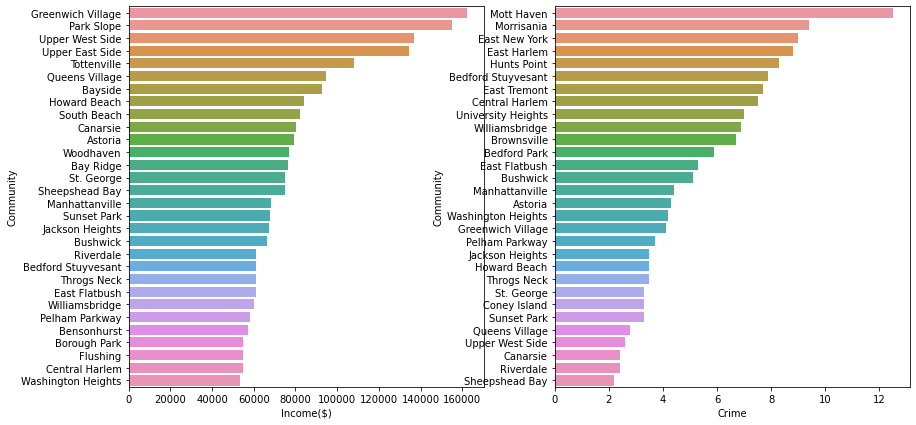

In [34]:
import seaborn as sns

name_list = []
time_list = []

fig,axes=plt.subplots(1,2,figsize=(14,7))
plt.xlabel('income($)')
plt.ylabel('Community')

sns.barplot(y="Community",x="Income($)",data=salary,ax=axes[0])
sns.barplot(y="Community",x="Crime",data=cr,ax=axes[1])
plt.show()


## 4.Modeling
### 4.1K-Means Clustering is used to split the communities into n part.  <br>
The Elbow Method,Calinski-Harabaz score and silhouette score are used to check the clustering effect and find the best clustering number.
The best clustering number is 3. By clustering, we found that communities in cluster2 were our target site.They have a high basic population density, high employment, high wages and low crime rates. These communities are: Washington Heights, Manhattanville, Central Harlem, Upper East Side, Upper West Side, Greenwich Village,Park Slope.

In [35]:
from sklearn import preprocessing

Feature = data[['Density','Population','Employrate(%)','Income($)','Crime','Trust(%)']]
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)
X[0:3]

array([[-0.17273266, -0.98984569, -0.72402068, -0.22048978, -0.72005565,
         0.73937388],
       [-0.17273266,  0.17332175, -0.19344064, -0.25118944,  0.89000668,
        -0.09372345],
       [-0.17273266, -0.44662563, -0.23765564, -0.3121072 , -0.25492654,
         0.60052433]])

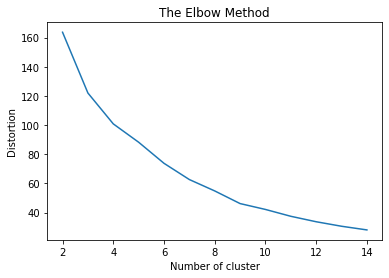

In [36]:
distortion = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
    
plt.plot(range(2,15), distortion)

plt.title('The Elbow Method')###
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [37]:
from sklearn.metrics import calinski_harabasz_score

for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=0).fit(X)
    score=calinski_harabasz_score(X,kmeans.labels_)
    print('Cluster %d calinski_harabaz score：%f'%(i,score))
    

Cluster 2 calinski_harabaz score：17.713046
Cluster 3 calinski_harabaz score：17.893282
Cluster 4 calinski_harabaz score：16.561645
Cluster 5 calinski_harabaz score：15.047638
Cluster 6 calinski_harabaz score：15.319043
Cluster 7 calinski_harabaz score：15.574660
Cluster 8 calinski_harabaz score：15.438739
Cluster 9 calinski_harabaz score：16.275273


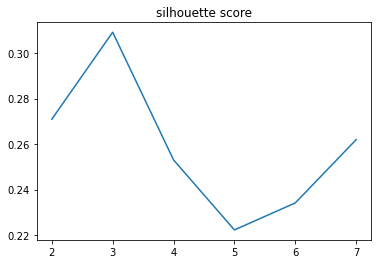

In [38]:
from sklearn.metrics import silhouette_score 

silhouettescore=[] 
for i in range(2,8):      
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)     
    score = silhouette_score(X,kmeans.labels_)      
    silhouettescore.append(score) 
    
plt.figure() 
plt.title('silhouette score')
plt.plot(range(2,8),silhouettescore,linewidth=1.5,linestyle='-') 
plt.show()

In [39]:
# set number of clusters
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

[[-0.55102313  0.1857135   0.04103286  0.09207354 -0.59970756  0.45536343]
 [ 0.05332847 -0.57120613 -0.91963858 -0.96431629  1.35188314 -1.02780227]
 [ 1.64798509  0.31393862  1.31618591  1.2259802  -0.23959261  0.18397566]]
[0 1 0 1 1 1 1 1 1 0 2 2 2 1 2 2 2 0 0 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Text(0, 0.5, 'trust')

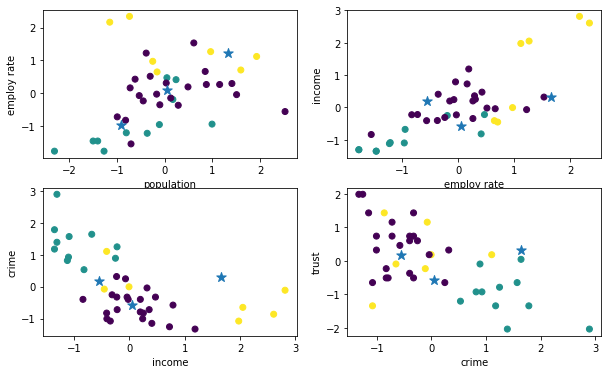

In [40]:

centers = kmeans.cluster_centers_ # data center
labels = kmeans.labels_   # 
print(centers)
print(labels)

plt.figure(figsize=(10,6))
plt.subplot(221)
plt.scatter(X[:, 1], X[:, 2], c=labels)  
plt.scatter(centers[:,2],centers[:,3],marker='*', s=100)
plt.xlabel('population')
plt.ylabel('employ rate')
 
plt.subplot(222)
plt.scatter(X[:, 2], X[:, 3], c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='*', s=100)
plt.xlabel('employ rate')
plt.ylabel('income')

plt.subplot(223)
plt.scatter(X[:, 3], X[:, 4], c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='*', s=100)
plt.xlabel('income')
plt.ylabel('crime')

plt.subplot(224)
plt.scatter(X[:, 4], X[:, 5], c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='*', s=100)
plt.xlabel('crime')
plt.ylabel('trust')

In [41]:
data['Cluster'] = labels
data

,Borough,Community,Latitude,Longitude,Density,Population,Employrate(%),Income($),Crime,Trust(%),Cluster
0,Bronx,Riverdale,40.890834,-73.912585,33867.0,104149.0,53.7,61248.0,2.4,77.0,0
1,Bronx,Williamsbridge,40.881039,-73.857446,33867.0,149128.0,57.3,60228.0,6.9,71.0,1
2,Bronx,Pelham Parkway,40.857413,-73.854756,33867.0,125155.0,57.0,58204.0,3.7,76.0,0
3,Bronx,Bedford Park,40.870185,-73.885512,33867.0,151684.0,61.4,41336.0,5.9,63.0,1
4,Bronx,University Heights,40.855727,-73.910416,33867.0,138209.0,52.1,32025.0,7.0,65.0,1
5,Bronx,East Tremont,40.842696,-73.887356,33867.0,88324.0,48.7,23605.0,7.7,62.0,1
6,Bronx,Mott Haven,40.806239,-73.916100,33867.0,93458.0,46.6,25074.0,12.5,57.0,1
7,Bronx,Hunts Point,40.809730,-73.883315,33867.0,53366.0,46.6,25074.0,8.3,57.0,1
8,Bronx,Morrisania,40.823592,-73.901506,33867.0,84606.0,48.7,23605.0,9.4,62.0,1
9,Bronx,Throgs Neck,40.815109,-73.816350,33867.0,110883.0,53.0,61029.0,3.5,82.0,0


In [42]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.
Then, focuse on these communities, utilizing the Foursquare API to explore the communities.

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data['Latitude'], data['Longitude'], data['Community'], data['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### 4.2 Explore Communities in Cluster2
#### Let's create a function to repeat the same process to all the communities in cluster2  <br>
Get the neighborhood's latitude and longitude values.<br>
Send the GET request and examine the resutls. <br>
And how many venues were returned by Foursquare? <br>

In [44]:
cluster2_data = data[data['Cluster'] == 2].reset_index(drop=True)
cluster2_data

,Borough,Community,Latitude,Longitude,Density,Population,Employrate(%),Income($),Crime,Trust(%),Cluster
0,Manhattan,Washington Heights,40.851903,-73.936900,71341.0,204096.0,63.4,53507.0,4.2,80.0,2
1,Manhattan,Manhattanville,40.816934,-73.957385,71341.0,132837.0,65.2,68370.0,4.4,73.0,2
2,Manhattan,Central Harlem,40.815976,-73.943211,71341.0,136351.0,63.0,54932.0,7.5,73.0,2
3,Manhattan,Upper East Side,40.775639,-73.960508,71341.0,216874.0,66.2,134264.0,1.4,62.0,2
4,Manhattan,Upper West Side,40.787658,-73.977059,71341.0,179682.0,67.2,136735.0,2.6,71.0,2
5,Manhattan,Greenwich Village,40.726933,-73.999914,71341.0,98076.0,73.3,162092.0,4.1,70.0,2
6,Brooklyn,Park Slope,40.672321,-73.977050,36147.0,114043.0,74.5,155250.0,2.0,82.0,2


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [45]:
CLIENT_ID = '040RDRKKNJERA54KPJHUSFB4ESFH3CDB1QOTNQH5XA0' # your Foursquare ID
CLIENT_SECRET = '3WYJTA25CKCPGJN4Z1BPGKMF5NG0XBZ25KTIAHVZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 040RDRKKNJERA54KPJHUSFB4ESFH3CDB1QOTNQH5XA0RG40T
CLIENT_SECRET:3WYJTA25CKCPGJN4Z1BPGKMF5NG0XBZ25KTIAHVZVKOC2MT4


<a id='item2'></a>


In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [47]:
# type your answer here
cluster2_venues = getNearbyVenues(names=cluster2_data['Community'],
                                   latitudes=cluster2_data['Latitude'],
                                   longitudes=cluster2_data['Longitude']
                                  )

Washington Heights
Manhattanville
Central Harlem
Upper East Side
Upper West Side
Greenwich Village
Park Slope


#### Let's check the size of the resulting dataframe


In [48]:
print(cluster2_venues.shape)
cluster2_venues.head()

(700, 7)


,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Washington Heights,40.851903,-73.9369,The Uptown Garrison,40.851255,-73.939473,Restaurant
1,Washington Heights,40.851903,-73.9369,Le Chéile,40.851459,-73.939989,Café
2,Washington Heights,40.851903,-73.9369,Green Juice Cafe,40.851898,-73.934827,Café
3,Washington Heights,40.851903,-73.9369,Burger Heights,40.850268,-73.934618,Burger Joint
4,Washington Heights,40.851903,-73.9369,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant


Let's check how many venues were returned for each neighborhood


In [49]:
cluster2_venues.groupby('Community').count()

,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community,,,,,,
Central Harlem,100,100,100,100,100,100
Greenwich Village,100,100,100,100,100,100
Manhattanville,100,100,100,100,100,100
Park Slope,100,100,100,100,100,100
Upper East Side,100,100,100,100,100,100
Upper West Side,100,100,100,100,100,100
Washington Heights,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues


In [50]:
print('There are {} uniques categories.'.format(len(cluster2_venues['Venue Category'].unique())))

There are 177 uniques categories.


<a id='item3'></a>


### 4.3.Analyze Each Community in Cluster2


In [51]:
# one hot encoding
cluster2_onehot = pd.get_dummies(cluster2_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cluster2_onehot['Community'] = cluster2_venues['Community'] 

# move neighborhood column to the first column
fixed_columns = [cluster2_onehot.columns[-1]] + list(cluster2_onehot.columns[:-1])
cluster2_onehot = cluster2_onehot[fixed_columns]

cluster2_onehot.head()

,Community,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Trail,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Washington Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Washington Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Washington Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Washington Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

And let's examine the new dataframe size.


In [52]:
cluster2_onehot.shape

(700, 178)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [53]:
cluster2_grouped = cluster2_onehot.groupby('Community').mean().reset_index()
cluster2_grouped

,Community,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Trail,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Cafeteria,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shoe Store,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tiki Bar,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Harlem,0.00,0.00,0.03,0.03,0.01,0.01,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.01,0.00,0.02,0.00,0.00,0.00,0.02,0.02,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.04,0.01,0.00,0.00,0.00,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02
1,Greenwich Village,0.00,0.00,0.00,0.03,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.02,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.02,0.01,0.05,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.02,0.00,0.08,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0

#### Let's confirm the new size


In [54]:
cluster2_grouped.shape

(7, 178)

In [55]:
c = ['Central Harlem','Greenwich Village','Manhattanville','Park Slope','Upper East Side','Upper West Side','Washington Heights']
cluster = pd.DataFrame(cluster2_grouped.values.T, columns=c)
cluster['Venue'] = cluster2_grouped.columns
cluster = cluster.drop(index = 0)

In [56]:
cluster

,Central Harlem,Greenwich Village,Manhattanville,Park Slope,Upper East Side,Upper West Side,Washington Heights,Venue
1,0,0,0,0.01,0,0.01,0.01,Accessories Store
2,0,0,0.01,0,0,0,0,Adult Boutique
3,0.03,0,0,0,0,0,0,African Restaurant
4,0.03,0.03,0.04,0.02,0.02,0.03,0.01,American Restaurant
5,0.01,0.01,0.01,0,0.01,0,0,Art Gallery
6,0.01,0.01,0,0,0.01,0,0,Art Museum
7,0.02,0,0.01,0.01,0,0.01,0,Arts & Crafts Store
8,0,0,0,0,0,0.02,0.01,Asian Restaurant
9,0,0.01,0,0,0,0,0,Australian Restaurant
10,0.01,0,0.01,0,0,0,0,BBQ Joint


In [57]:
central = cluster[["Venue","Central Harlem"]].sort_values(by ="Central Harlem",ascending=False)[:15]
central

,Venue,Central Harlem
28,Café,0.05
146,Southern / Soul Food Restaurant,0.05
141,Seafood Restaurant,0.04
67,French Restaurant,0.03
14,Bar,0.03
79,Gym / Fitness Center,0.03
101,Lounge,0.03
162,Theater,0.03
4,American Restaurant,0.03
3,African Restaurant,0.03


In [58]:
greenwich = cluster[["Venue","Greenwich Village"]].sort_values(by ="Greenwich Village",ascending=False)[:15]
# greenwich

In [59]:
manhattanville = cluster[["Venue","Manhattanville"]].sort_values(by ="Manhattanville",ascending=False)[:15]
# manhattanville

In [60]:
park = cluster[["Venue","Park Slope"]].sort_values(by ="Park Slope",ascending=False)[:15]
# park

In [61]:
upper = cluster[["Venue","Upper East Side"]].sort_values(by ="Upper East Side",ascending=False)[:15]
# upper

In [62]:
west = cluster[["Venue","Upper West Side"]].sort_values(by ="Upper West Side",ascending=False)[:15]
# west

In [63]:
washington = cluster[["Venue","Washington Heights"]].sort_values(by ="Washington Heights",ascending=False)[:15]
# washington

The proportion of Venues in each Community 


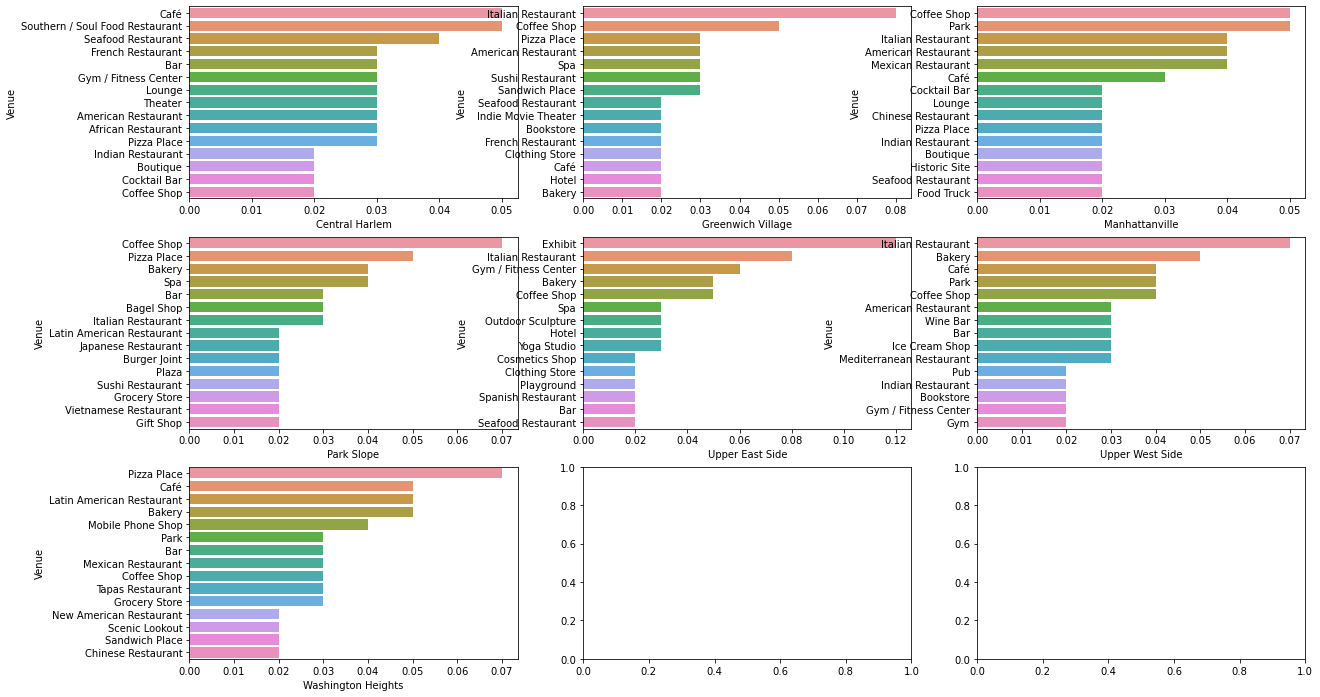

In [64]:
import seaborn as sns

print("The proportion of Venues in each Community ")
fig,axes=plt.subplots(3,3,figsize=(20,12))

sns.barplot( y="Venue",x="Central Harlem",data=central,ax=axes[0][0]) 
sns.barplot( y="Venue",x="Greenwich Village",data=greenwich,ax=axes[0][1]) 
sns.barplot( y="Venue",x="Manhattanville",data=manhattanville,ax=axes[0][2]) 
sns.barplot( y="Venue",x="Park Slope",data=park,ax=axes[1][0]) 
sns.barplot( y="Venue",x="Upper East Side",data=upper,ax=axes[1][1]) 
sns.barplot( y="Venue",x="Upper West Side",data=west,ax=axes[1][2]) 
sns.barplot( y="Venue",x="Washington Heights",data=washington,ax=axes[2][0]) 
plt.show()

#### Let's print each neighborhood along with the top 30 most common venues


In [65]:
num_top_venues = 30

for hood in cluster2_grouped['Community']:
    print("----"+hood+"----")
    temp = cluster2_grouped[cluster2_grouped['Community'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Harlem----
                              venue  freq
0                              Café  0.05
1   Southern / Soul Food Restaurant  0.05
2                Seafood Restaurant  0.04
3                 French Restaurant  0.03
4                               Bar  0.03
5              Gym / Fitness Center  0.03
6                            Lounge  0.03
7                           Theater  0.03
8               American Restaurant  0.03
9                African Restaurant  0.03
10                      Pizza Place  0.03
11                Indian Restaurant  0.02
12                         Boutique  0.02
13                     Cocktail Bar  0.02
14                      Coffee Shop  0.02
15                        Jazz Club  0.02
16                              Gym  0.02
17                      Yoga Studio  0.02
18                       Public Art  0.02
19              Fried Chicken Joint  0.02
20                 Sushi Restaurant  0.02
21              Arts & Crafts Store  0.02
22         

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community'] = cluster2_grouped['Community']

for ind in np.arange(cluster2_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cluster2_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(8)

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Harlem,Café,Southern / Soul Food Restaurant,Seafood Restaurant,African Restaurant,American Restaurant,Pizza Place,Gym / Fitness Center,Bar,Lounge,Theater
1,Greenwich Village,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Spa,Sandwich Place,American Restaurant,Gourmet Shop,Clothing Store,Hotel
2,Manhattanville,Park,Coffee Shop,American Restaurant,Mexican Restaurant,Italian Restaurant,Café,Lounge,Theater,Historic Site,Latin American Restaurant
3,Park Slope,Coffee Shop,Pizza Place,Spa,Bakery,Bar,Italian Restaurant,Bagel Shop,Bookstore,Burger Joint,Deli / Bodega
4,Upper East Side,Exhibit,Italian Restaurant,Gym / Fitness Center,Bakery,Coffee Shop,Spa,Hotel,Outdoor Sculpture,Yoga Studio,Salad Place
5,Upper West Side,Italian Restaurant,Bakery,Café,Park,Coffee Shop,American Restaurant,Ice Cream Shop,Wine Bar,Mediterranean Restaurant,Bar
6,Washington Heights,Pizza Place,Latin American Restaurant,Bakery,Café,Mobile Phone Shop,Coffee Shop,Grocery Store,Park,Bar,Tapas Restaurant


<a id='item4'></a>


## 4. Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [68]:
# set number of clusters
kclusters = 2

manhattan_grouped_clustering = cluster2_grouped.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = cluster2_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Community'), on='Community')

manhattan_merged.head(8) # check the last columns!

,Borough,Community,Latitude,Longitude,Density,Population,Employrate(%),Income($),Crime,Trust(%),Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Washington Heights,40.851903,-73.936900,71341.0,204096.0,63.4,53507.0,4.2,80.0,2,1,Pizza Place,Latin American Restaurant,Bakery,Café,Mobile Phone Shop,Coffee Shop,Grocery Store,Park,Bar,Tapas Restaurant
1,Manhattan,Manhattanville,40.816934,-73.957385,71341.0,132837.0,65.2,68370.0,4.4,73.0,2,1,Park,Coffee Shop,American Restaurant,Mexican Restaurant,Italian Restaurant,Café,Lounge,Theater,Historic Site,Latin American Restaurant
2,Manhattan,Central Harlem,40.815976,-73.943211,71341.0,136351.0,63.0,54932.0,7.5,73.0,2,1,Café,Southern / Soul Food Restaurant,Seafood Restaurant,African Restaurant,American Restaurant,Pizza Place,Gym / Fitness Center,Bar,Lounge,Theater
3,Manhattan,Upper East Side,40.775639,-73.960508,71341.0,216874.0,66.2,134264.0,1.4,62.0,2,0,Exhibit,Italian Restaurant,Gym / Fitness Center,Bakery,Coffee Shop,Spa,Hotel,Outdoor Sculpture,Yoga Studio,Salad Place
4,Manhattan,Upper West Side,40.787658,-73.977059,71341.0,179682.0,67.2,136735.0,2.6,71.0,2,1,Italian Restaurant,Bakery,Café,Park,Coffee Shop,American Restaurant,Ice Cream Shop,Wine Bar,Mediterranean Restaurant,Bar
5,Manhattan,Greenwich Village,40.726933,-73.999914,71341.0,98076.0,73.3,162092.0,4.1,70.0,2,1,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Spa,Sandwich Place,American Restaurant,Gourmet Shop,Clothing Store,Hotel
6,Brooklyn,Park Slope,40.672321,-73.977050,36147.0,114043.0,74.5,155250.0,2.0,82.0,2,1,Coffee Shop,Pizza Place,Spa,Bakery,Bar,Italian Restaurant,Bagel Shop,Bookstore,Burger Joint,Deli / Bodega


Finally, let's visualize the resulting clusters


In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Community'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 5. Examine Clusters


Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 1


In [71]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Community,Population,Employrate(%),Income($),Crime,Trust(%),Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Upper East Side,216874.0,66.2,134264.0,1.4,62.0,2,0,Exhibit,Italian Restaurant,Gym / Fitness Center,Bakery,Coffee Shop,Spa,Hotel,Outdoor Sculpture,Yoga Studio,Salad Place


#### Cluster 2


In [2]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

## 5.Conclusions

In the communities Washington Heights, Manhattanville, Central Harlem, Upper East Side, Upper West Side, Greenwich Village,Park Slope,  Central Harlem has higher crime rate, it's not a good place to start a restaurant. By Analysing each neighborhood along with the top 10 most common venues, there are many Italian restaurants in Greenwich Village, Manhattanville,Upper East Side and Upper West Side, there will be fierce competition to set up Italian restaurant here. So, Washington Heights or Park Slope is better. 


SyntaxError: invalid syntax (<ipython-input-73-ada19a215d76>, line 1)